In [2]:
import pandas as pd
df = pd.read_csv('cookie_cats.csv')

df.head()
df.info()
df.describe()
df.groupby('version').count()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [3]:
df.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
# Calculate the mean of the retention columns
mean_retention = df[['retention_1', 'retention_7']].mean()

print(mean_retention)

retention_1    0.445210
retention_7    0.186065
dtype: float64


In [5]:
gate_30_mean = df.groupby(["version"]).mean()

In [6]:
gate_30_mean

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


In [8]:
import numpy as np

# --- 1-Day Retention ---

# Separate the boolean retention data for each group into NumPy arrays
retention_1_30 = df[df['version'] == 'gate_30']['retention_1'].values
retention_1_40 = df[df['version'] == 'gate_40']['retention_1'].values

# Set number of iterations
iterations = 10000

# Generate bootstrapped samples using NumPy's random.choice
# This creates a 2D array where each row is a new "experiment"
boot_1d_30 = np.random.choice(retention_1_30, size=(iterations, len(retention_1_30)), replace=True)
boot_1d_40 = np.random.choice(retention_1_40, size=(iterations, len(retention_1_40)), replace=True)

# Calculate the mean for each row (each experiment) in a single vectorized operation
boot_1d_means_30 = boot_1d_30.mean(axis=1)
boot_1d_means_40 = boot_1d_40.mean(axis=1)

# Calculate the difference in means for all 5000 experiments
boot_1d_diff = boot_1d_means_30 - boot_1d_means_40
print ("1-day Retention Difference: ", boot_1d_diff)

# --- 7-Day Retention (Repeat the process) ---

retention_7_30 = df[df['version'] == 'gate_30']['retention_7'].values
retention_7_40 = df[df['version'] == 'gate_40']['retention_7'].values

boot_7d_30 = np.random.choice(retention_7_30, size=(iterations, len(retention_7_30)), replace=True)
boot_7d_40 = np.random.choice(retention_7_40, size=(iterations, len(retention_7_40)), replace=True)

boot_7d_means_30 = boot_7d_30.mean(axis=1)
boot_7d_means_40 = boot_7d_40.mean(axis=1)

boot_7d_diff = boot_7d_means_30 - boot_7d_means_40
print ("7-day Retention Difference: ", boot_7d_diff)

# --- Calculate P-Values (Same as before) ---

# Calculate the probability that the difference is zero or negative
p_value_1d = (boot_1d_diff <= 0).mean()
p_value_7d = (boot_7d_diff <= 0).mean()

print(f"P-value for 1-day retention: {p_value_1d:.4f}")
print(f"P-value for 7-day retention: {p_value_7d:.4f}")

1-day Retention Difference:  [0.00816365 0.00556017 0.01061841 ... 0.00136948 0.00498626 0.00290626]
7-day Retention Difference:  [0.01055313 0.00550226 0.00727412 ... 0.01066628 0.00922559 0.01388051]
P-value for 1-day retention: 0.0390
P-value for 7-day retention: 0.0004


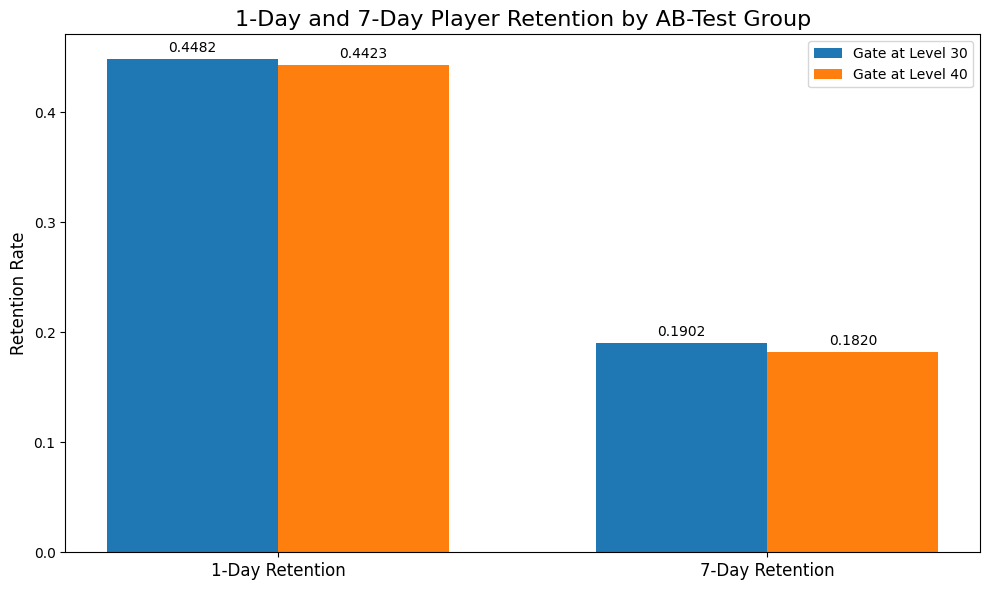

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data Preparation ---
# First, get the data we need from the groupby operation you already performed
retention_by_version = df.groupby('version')[['retention_1', 'retention_7']].mean()

# Define the labels for our x-axis groups
labels = ['1-Day Retention', '7-Day Retention']

# Get the mean values for each group
gate_30_means = retention_by_version.loc['gate_30'].values
gate_40_means = retention_by_version.loc['gate_40'].values

# --- Chart Creation ---
# Set the x-axis positions for the groups
x = np.arange(len(labels))  # This will be [0, 1]

# Set the width of each individual bar
width = 0.35

# Create the plot and the axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for the gate_30 group
# We shift them to the left of the center position (x)
rects1 = ax.bar(x - width/2, gate_30_means, width, label='Gate at Level 30')

# Plot the bars for the gate_40 group
# We shift them to the right of the center position (x)
rects2 = ax.bar(x + width/2, gate_40_means, width, label='Gate at Level 40')

# --- Professional Touches (Crucial for a good chart) ---
# Add a descriptive title and labels
ax.set_title('1-Day and 7-Day Player Retention by AB-Test Group', fontsize=16)
ax.set_ylabel('Retention Rate', fontsize=12)

# Set the x-axis tick labels to be our metric names
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)

# Add a legend to explain which bar is which
ax.legend()

# Add labels on top of the bars to show the exact values
ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')

# Ensure the layout is tight
fig.tight_layout()

# Display the chart
plt.show()